<a href="https://colab.research.google.com/github/aiswaryapaul/SVD/blob/main/Netflix_recommendation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

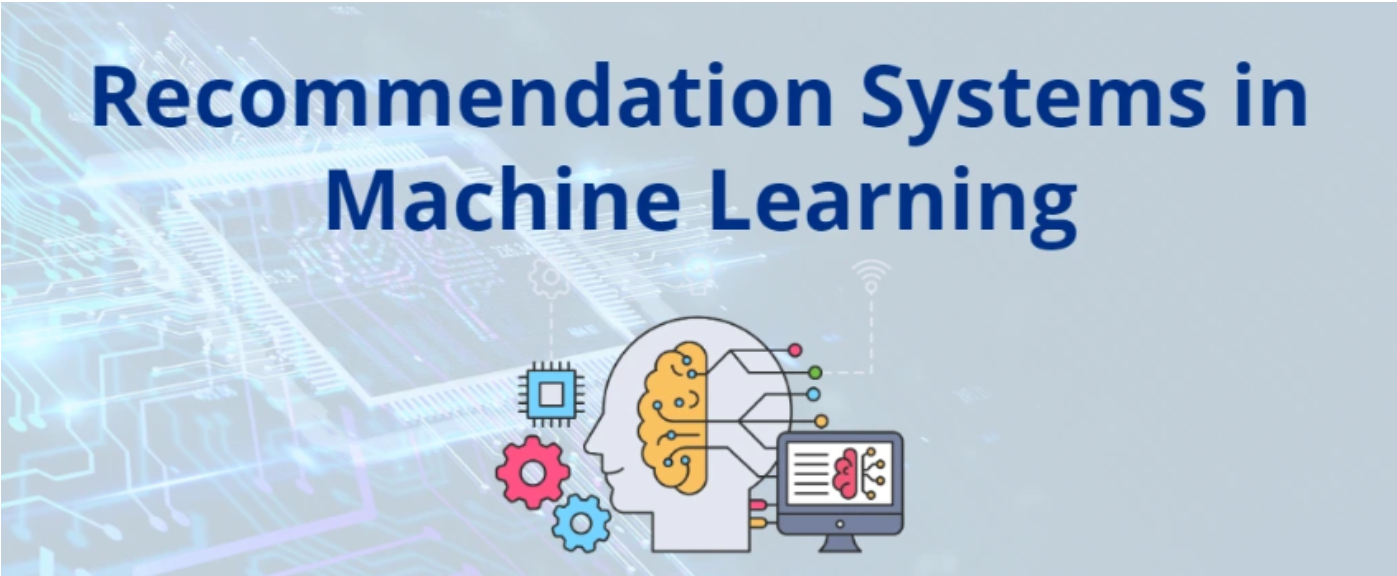

# **Netflix Recommendation Engine**

**What are Recommender Systems?**

Recommender systems are algorithms designed to suggest relevant items to users. These systems are used in various domains such as e-commerce, streaming services, and social media. They enhance user experience by filtering vast amounts of information to deliver personalized content.

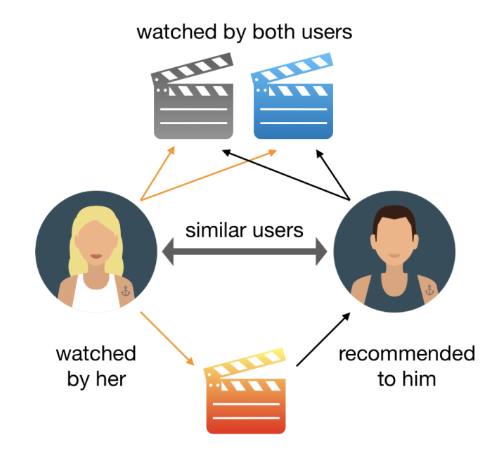


**SVD (Singular Value Decomposition) in a recommendation system works by finding patterns in user preferences and item similarities. Here's a basic idea without going deep into the topic**

**1) What the System Has: A big table (matrix) with users on one side and items (like movies) on the other. Users give ratings to items, but not everyone has rated everything**

**2) What SVD Does: SVD looks at the ratings that are available and tries to figure out the hidden connections between users and items. It learns what kind of movies users like based on their previous ratings**

**3) How It Helps: Once SVD understands these patterns, it can predict how a user might rate a movie they haven’t seen yet. Based on these predictions, the system recommends movies that the user is most likely to enjoy**

**4) Step-by-Step Implementation of SVD in a Recommendation System**

Install and Import Libraries

Load and Prepare the Dataset

Train the SVD Model

Evaluate the Model

Make Predictions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_dataset = pd.read_csv("/content/drive/MyDrive/NETFLIX/Copy of combined_data_1.txt (1).zip",header  =None,names =['Cust_Id',"Rating"],usecols =[0,1])

In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


now thw pblm is movieid+custid got mergedup into one col that cust idcol

now our target is to seperate it

we can identify the ,movie id by 2 conditions

1-1: colon sould be there

2- null value will bw there in rating col


In [ ]:
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count ['Rating']
movie_count

4499

In [ ]:
total_count = netflix_dataset['Cust_Id'].nunique()

In [ ]:
total_count

475257

In [ ]:
customer_count = total_count - movie_count

In [ ]:
customer_count

470758

In [ ]:
rating_count = netflix_dataset['Cust_Id'].count()- movie_count
rating_count

24053764

In [ ]:
#to find how ,many users have ated as 1,2,3,4,5, stars to the movies
stars = netflix_dataset.groupby("Rating")['Rating'].agg(['count'])

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


Text(0.5, 1.0, 'Total Movie: 4499, Total Customers: 470758, Total no.of ratings: 24053764')

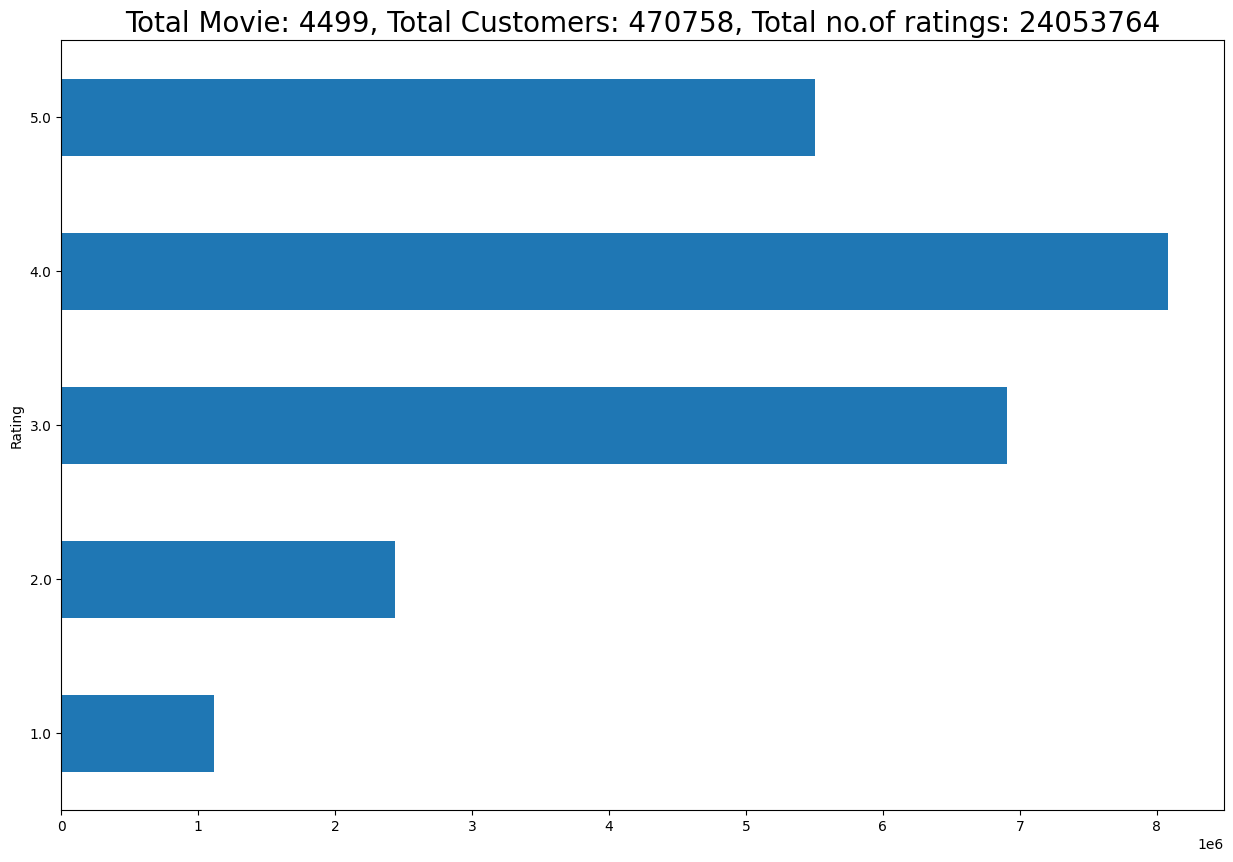

In [ ]:
ax =  stars.plot(kind = 'barh',legend = False,figsize =(15,10))
plt.title(f'Total Movie: {movie_count}, Total Customers: {customer_count}, Total no.of ratings: {rating_count}', fontsize = 20)

In [ ]:
movie_id = None
movie_np =[]

for i in netflix_dataset['Cust_Id']:
  if ':' in i:
    movie_id = int(i.replace(":",''))
  movie_np.append(movie_id)

In [ ]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
netflix_dataset['Movie_Id'] = movie_np

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
#pre-filtering
# 1.remove the movies which got less number ratings
# 2.removing the customers who have given less number of ratings

In [ ]:
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

/tmp/ipython-input-21-2277237340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
#for each movie how many ratings we got??

netflix_dataset['Movie_Id'].value_counts()

,count
Movie_Id,
1905,193941
2152,162597
3860,160454
4432,156183
571,154832
...,...
4294,44
915,43
3656,42


In [ ]:
#for each movie how many ratings we got??

dataset_movie_summary = netflix_dataset.groupby("Movie_Id")['Rating'].agg(['count'])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#now we will create a benchmark (consider 60 percentile)
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)

In [ ]:
movie_benchmark

908.0

In [ ]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

In [ ]:
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
len(drop_movie_list)

2699

In [ ]:
dataset_cust_summary = netflix_dataset.groupby("Cust_Id")['Rating'].agg(['count'])

In [ ]:
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6),0)

In [ ]:
cust_benchmark

36.0

In [ ]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

In [ ]:
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [ ]:
len(drop_cust_list)

282042

In [ ]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/NETFLIX/Copy of movie_titles.csv",encoding = 'ISO-8859-1',header = None,names =['Movie_Id','Year','Name'],usecols =[0,1,2])

In [ ]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


from matplotlib import pyplot as plt
df_title['Movie_Id'].plot(kind='hist', bins=20, title='Movie_Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_title['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_title.plot(kind='scatter', x='Movie_Id', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Movie_Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Movie_Id'}, axis=1)
              .sort_values('Movie_Id', ascending=True))
  xs = counted['Movie_Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_title.sort_values('Movie_Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Movie_Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_title.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_title['Movie_Id'].plot(kind='line', figsize=(8, 4), title='Movie_Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_title['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
!pip install sckit-surprise

ERROR: Could not find a version that satisfies the requirement sckit-surprise (from versions: none)
ERROR: No matching distribution found for sckit-surprise


In [ ]:
# import subprocess
# import os
# import sys
# def install_surprise_fix():
#     try:
#         # Step 1: Uninstall NumPy and scikit-surprise
#         print("Uninstalling existing NumPy and scikit-surprise...")
#         subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "numpy", "scikit-surprise"])
#         # Step 2: Install a compatible NumPy version (1.23.5)
#         print("Installing NumPy 1.23.5...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy==1.23.5"])
#         # Step 3: Install scikit-surprise without cache
#         print("Installing scikit-surprise...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "--no-cache-dir", "scikit-surprise"])
#         # Step 4: Restart kernel (for Jupyter or Colab)
#         print("Restarting kernel to apply changes...")
#         os._exit(0) # Force restart in Jupyter/Colab

#     except Exception as e:
#       print(f"Error: {e}")
# # Run the fix
# install_surprise_fix()

In [ ]:
from surprise import Reader, Dataset,SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
data = Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000],reader)

In [ ]:
data

In [ ]:
model = SVD()

In [ ]:
cross_validate(model,data,measures =['RMSE'],cv =3)

{'test_rmse': array([1.01632428, 1.02315399, 1.01559115]),
 'fit_time': (1.4222180843353271, 1.5239393711090088, 3.3394527435302734),
 'test_time': (0.18005585670471191, 0.31179118156433105, 0.3928213119506836)}

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
user_rating = netflix_dataset[netflix_dataset['Cust_Id'] ==1331154]

In [ ]:
user_rating

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:
user_1331154 = df_title.copy()

In [ ]:
user_1331154 = user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]

In [ ]:
user_1331154["Estimated_score"] =user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154,x).est)

In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimated_score
2,3,1997.0,Character,3.752329
4,5,2004.0,The Rise and Fall of ECW,4.293379
5,6,1997.0,Sick,3.413263
7,8,2004.0,What the #$*! Do We Know!?,3.721227
15,16,1996.0,Screamers,3.300220
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.699727
17766,17767,2004.0,Fidel Castro: American Experience,3.699727
17767,17768,2000.0,Epoch,3.699727
17768,17769,2003.0,The Company,3.699727


In [ ]:
user_1331154.sort_values('Estimated_score',ascending = False).head()

,Movie_Id,Year,Name,Estimated_score
17,18,1994.0,Immortal Beloved,4.389508
4,5,2004.0,The Rise and Fall of ECW,4.293379
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.104492
27,28,2002.0,Lilo and Stitch,3.872795
29,30,2003.0,Something's Gotta Give,3.802316
